# 1. Dataset for emotion prediction

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

'0': sadness
               '1': joy
               '2': love
               '3': anger
               '4': fear
               '5': surprise

In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [3]:
from datasets import load_dataset
dataset = load_dataset('json', data_files={
    'train': 'train.jsonl',
    'test':'validation.jsonl'})

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

vectorizer = CountVectorizer(max_features=500, min_df=4, max_df=0.7, stop_words=stopwords.words('english'))
X_train_vec = vectorizer.fit_transform(dataset['train']['text'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
vectorizer.get_feature_names_out()

array(['able', 'absolutely', 'accepted', 'aching', 'actually', 'admit',
       'afraid', 'agitated', 'ago', 'almost', 'alone', 'already', 'also',
       'always', 'amazed', 'amazing', 'amp', 'angry', 'annoyed',
       'another', 'anxious', 'anymore', 'anyone', 'anything',
       'apprehensive', 'around', 'ashamed', 'ask', 'asked', 'assured',
       'away', 'awful', 'awkward', 'baby', 'back', 'bad', 'beaten',
       'beautiful', 'become', 'bed', 'began', 'believe', 'beloved',
       'best', 'better', 'big', 'bit', 'blank', 'blessed', 'blog', 'body',
       'book', 'books', 'bothered', 'brave', 'burdened', 'call', 'calm',
       'came', 'cannot', 'cant', 'care', 'caring', 'cause', 'certain',
       'change', 'child', 'children', 'class', 'close', 'cold', 'come',
       'comes', 'comfortable', 'coming', 'completely', 'confident',
       'confused', 'content', 'control', 'convinced', 'cool', 'could',
       'couldnt', 'cranky', 'creative', 'curious', 'cute', 'dangerous',
       'day', 'day

In [8]:
X_train_vec[:1].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [9]:
X_train_vec[:1].toarray().sum()

2

In [10]:
dataset['train']['text'][:1]

['i didnt feel humiliated']

In [11]:
vocabulary = vectorizer.get_feature_names_out()

In [12]:
len(vocabulary)

500

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer

In [14]:
tfidf = TfidfTransformer()

In [15]:
X_train_idf = tfidf.fit_transform(X_train_vec)

In [16]:
X_train_idf[:1].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [17]:
X_train_idf[:1].toarray().sum()

1.2295066506768701

In [18]:
X_test_vec = vectorizer.transform(dataset['test']['text'])

In [19]:
X_test_idf = tfidf.transform(X_test_vec)

In [20]:
X_test_idf[:1].toarray().sum()

2.52371815232768

In [21]:
X_train = X_train_idf.toarray()
X_test = X_test_idf.toarray()

In [22]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [23]:
X_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [24]:
X_train, X_test, y_train, y_test = X_train,X_test,dataset['train']['label'],\
                            dataset['test']['label']

In [ ]:
# Задача. Варьируя параметры ансамбля в подходам блэндинг и стэкинг, обучить оптимальный классификатор.
# Визуализировать графики зависимости предсказания от параметров модели.

In [25]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [26]:
def stacking_model(N=10,
    first_model_estimators=2,
    first_model_depth=2,
    first_model_samples_leaf=1,
    final_model_estimators=10,
    final_model_depth=6,
    final_model_samples_leaf=1):

    predictions_first_stage = []
    model_stack = []
    kf = KFold(n_splits=N, random_state=None, shuffle=False)

    pre_predictions = np.zeros((len(X_train), N))

    for i, (train_idx, test_idx) in enumerate(kf.split(X_train)):
        X_train_split, X_test_split = np.array(X_train)[train_idx], np.array(X_train)[test_idx]
        y_train_split, y_test_split = np.array(y_train)[train_idx], np.array(y_train)[test_idx]

        model_stack.append(RandomForestClassifier(
                            n_estimators=first_model_estimators,
                            max_depth=first_model_depth,
                            random_state=i))
        model_stack[-1].fit(X_train_split, y_train_split)
        pre_predictions[test_idx, i] = model_stack[-1].predict(X_test_split)

    final_model = RandomForestClassifier(
        n_estimators=final_model_estimators,
        random_state=42)
    final_model.fit(pre_predictions, y_train)

    return model_stack, final_model

In [27]:
def predict_stacking(models, final_model, data):
    stage_predictions = []
    for model in models:
        stage_predictions.append(model.predict(data))
    predictions_transposed = np.array(stage_predictions).transpose()
    return final_model.predict(predictions_transposed)

In [30]:
forest_model_accuracies = []

for i in range(1, 301, 50):
    rf_model = RandomForestClassifier(n_estimators=i, max_depth=200, n_jobs=-1, random_state=14)
    rf_model.fit(X_train, y_train)
    y_pred_test = rf_model.predict(X_test)
    forest_model_accuracies.append(metrics.accuracy_score(y_test, y_pred_test))

<ipython-input-31-bfc386035773>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


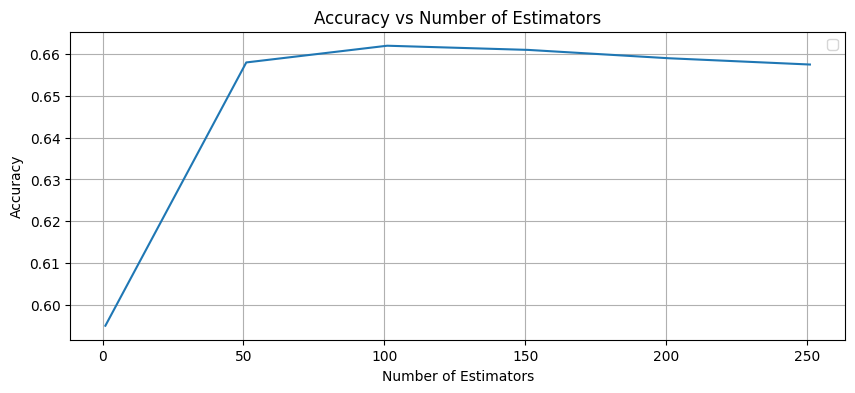

In [31]:
plt.figure(figsize=(10, 4))
plt.title('Accuracy vs Number of Estimators')

plt.plot([i for i in range(1, 301, 50)], forest_model_accuracies)
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [32]:
forest_model_depth_accuracies = []

for i in range(1, 301, 50):
    rf_model = RandomForestClassifier(n_estimators=200, max_depth=i, n_jobs=-1, random_state=14)
    rf_model.fit(X_train, y_train)
    y_pred_test = rf_model.predict(X_test)
    forest_model_depth_accuracies.append(metrics.accuracy_score(y_test, y_pred_test))

<ipython-input-33-8d628b4546ef>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


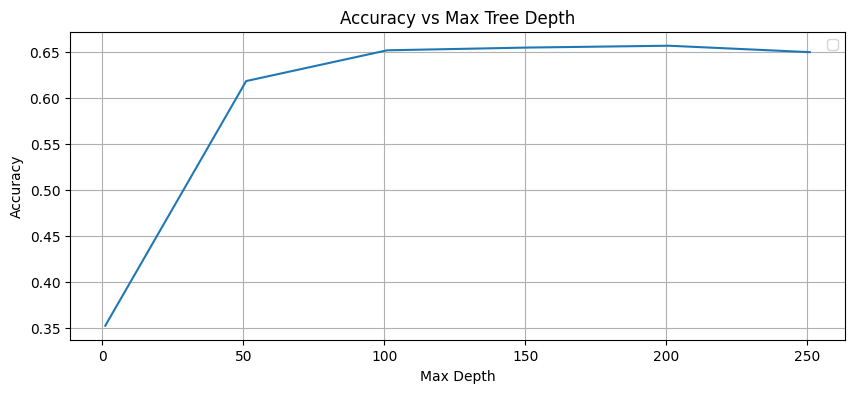

In [33]:
plt.figure(figsize=(10, 4))
plt.title('Accuracy vs Max Tree Depth')

plt.plot([i for i in range(1, 301, 50)], forest_model_depth_accuracies)
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [34]:
stacking_N = 2
stack_predictions = []
model_stack = []
kf = KFold(n_splits=stacking_N, random_state=None, shuffle=False)

pre_predictions = np.zeros((len(X_train), stacking_N))

for i, (train_idx, test_idx) in enumerate(kf.split(X_train)):
    X_train_split, X_test_split = np.array(X_train)[train_idx], np.array(X_train)[test_idx]
    y_train_split, y_test_split = np.array(y_train)[train_idx], np.array(y_train)[test_idx]

    model_stack.append(RandomForestClassifier(n_estimators=200, max_depth=100, random_state=i))
    model_stack[-1].fit(X_train_split, y_train_split)
    pre_predictions[test_idx, i] = model_stack[-1].predict(X_test_split)

In [35]:
final_model_accuracies = []

for i in range(1, 1001, 50):
    final_model = RandomForestClassifier(n_estimators=i, max_depth=6, random_state=14)
    final_model.fit(pre_predictions, y_train)
    y_pred_test = predict_stacking(model_stack, final_model, X_test)
    final_model_accuracies.append(metrics.accuracy_score(y_test, y_pred_test))

<ipython-input-36-c941a5c9afaf>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


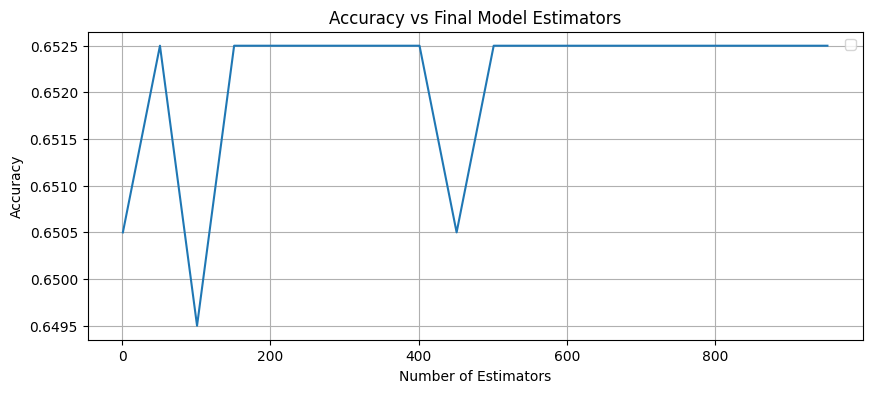

In [36]:
plt.figure(figsize=(10, 4))
plt.title('Accuracy vs Final Model Estimators')

plt.plot([i for i in range(1, 1001, 50)], final_model_accuracies)
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [38]:
max_depth_final_accuracies = []

for i in range(2, 1002, 50):
    final_model = RandomForestClassifier(n_estimators=2, min_samples_split=i, random_state=14)
    final_model.fit(pre_predictions, y_train)
    y_pred_test = predict_stacking(model_stack, final_model, X_test)
    max_depth_final_accuracies.append(metrics.accuracy_score(y_test, y_pred_test))

<ipython-input-39-db68c13c2607>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


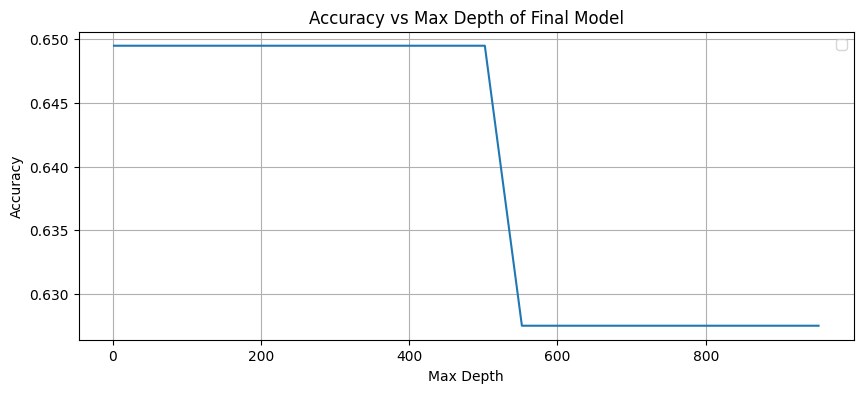

In [39]:
plt.figure(figsize=(10, 4))
plt.title('Accuracy vs Max Depth of Final Model')

plt.plot([i for i in range(2, 1002, 50)], max_depth_final_accuracies)
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [41]:
stacking_accuracy_scores = []

for i in range(2, 27, 5):
    crf_stack, final_model = stacking_model(N=i,
                                            first_model_estimators=200,
                                            first_model_depth=100,
                                            final_model_estimators=2)
    y_pred_test = predict_stacking(crf_stack, final_model, X_test)
    stacking_accuracy_scores.append(metrics.accuracy_score(y_test, y_pred_test))

<ipython-input-42-6eeeccb311a5>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


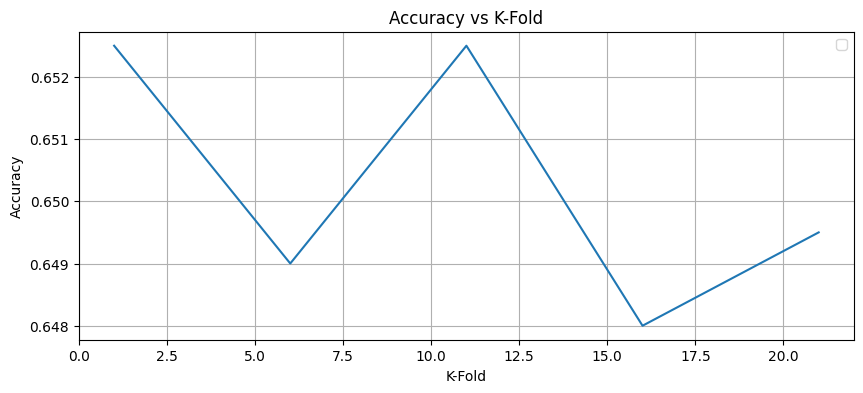

In [42]:
plt.figure(figsize=(10, 4))
plt.title('Accuracy vs K-Fold')

plt.plot([i for i in range(2, 27, 5)], stacking_accuracy_scores)
plt.legend()
plt.xlabel('K-Fold')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [43]:
crf_stack, final_model = stacking_model(N=2,
                                        first_model_estimators=200,
                                        first_model_depth=100,
                                        final_model_estimators=2)
y_pred_test = predict_stacking(crf_stack, final_model, X_test)
print('Stacking model accuracy:', np.round(metrics.accuracy_score(y_test, y_pred_test), 4))

Stacking model accuracy: 0.6525


In [44]:
X_train_split_0, X_train_split_1, y_train_split_0, y_train_split_1 = train_test_split(X_train, y_train, test_size=0.33, random_state=14)

In [45]:
from sklearn.ensemble import RandomForestClassifier


def blending_model(N=2):
    predictions = []
    base_models = []
    for n in range(1, N+1):
        base_models.append(RandomForestClassifier(n_estimators=200, max_depth=100, random_state=n))
        base_models[-1].fit(X_train_split_0, y_train_split_0)
        predictions.append(base_models[-1].predict(X_train_split_1).reshape(len(X_train_split_1), 1))
    predictions_array = np.array(predictions).transpose()[0]

    return base_models, predictions_array

In [46]:
def predict_blending(models, final_model, data):
    stage_predictions = []
    for model in models:
        stage_predictions.append(model.predict(data))
    predictions_transposed = np.array(stage_predictions).transpose()
    return final_model.predict(predictions_transposed)

In [47]:
blending_accuracy_scores = []

for i in range(1, 5):
    base_models, predictions_array = blending_model(i)
    final_model = RandomForestClassifier(n_estimators=2, random_state=42)
    final_model.fit(predictions_array, y_train_split_1)
    y_pred_test = predict_blending(base_models, final_model, X_test)
    blending_accuracy_scores.append(metrics.accuracy_score(y_test, y_pred_test))

<ipython-input-48-75d2fab916c9>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


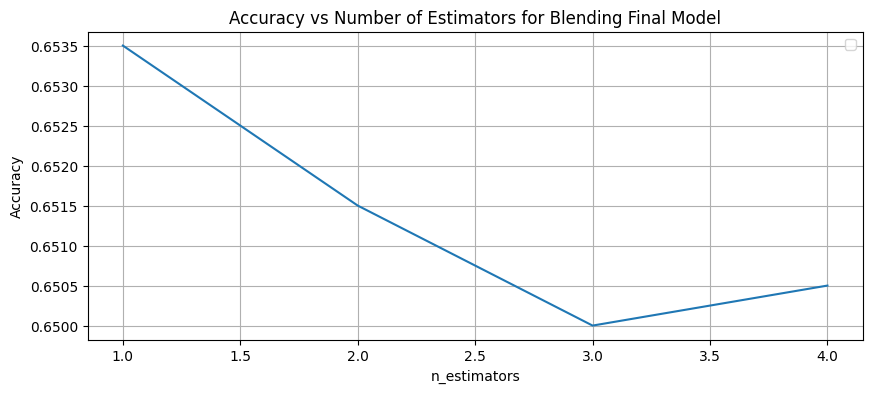

In [48]:
plt.figure(figsize=(10, 4))
plt.title('Accuracy vs Number of Estimators for Blending Final Model')

plt.plot([i for i in range(1, 5)], blending_accuracy_scores)
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [49]:
base_models, predictions_array = blending_model(2)
final_model = RandomForestClassifier(n_estimators=2, random_state=14)
final_model.fit(predictions_array, y_train_split_1)
y_pred_test = predict_blending(base_models, final_model, X_test)
print('Blending model accuracy:', metrics.accuracy_score(y_test, y_pred_test))

Blending model accuracy: 0.653
